<a href="https://colab.research.google.com/github/fx-manmeet/learn-ml-repo/blob/main/Classification_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Training a CNN model for image classification of cats and dogs (binary classification)**

###**Dataset used:**

Cats and Dogs image classification by SAMUEL CORTINHAS
* Over a 25000 images of cats and dogs scraped off from different sites.
* Image format is jpg.

In [1]:
# import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
#downloading it from google drive
#Load and extract dataset zip file.
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
From (redirected): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk&confirm=t&uuid=5b9b1f3b-6f5b-48b4-afdf-0e70d00c185c
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:07<00:00, 121MB/s] 


In [3]:
# Define our images sizes
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [4]:
filenames = os.listdir("./train")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'class': categories
})
df.head()

,filename,class
0,dog.5285.jpg,1
1,dog.5277.jpg,1
2,cat.3614.jpg,0
3,cat.5745.jpg,0
4,cat.9624.jpg,0


####**Check counts in each class**

<Axes: xlabel='class'>

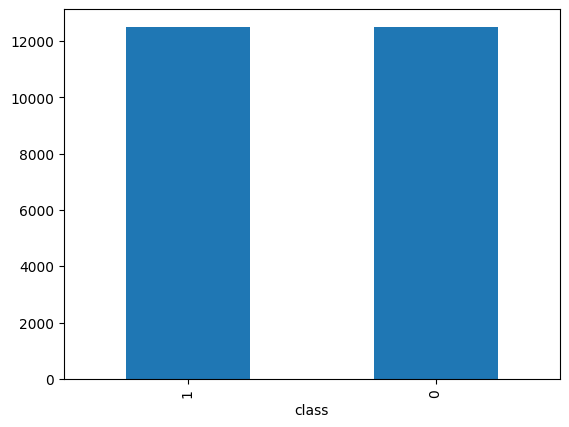

In [5]:
df['class'].value_counts().plot.bar()

### **View data**

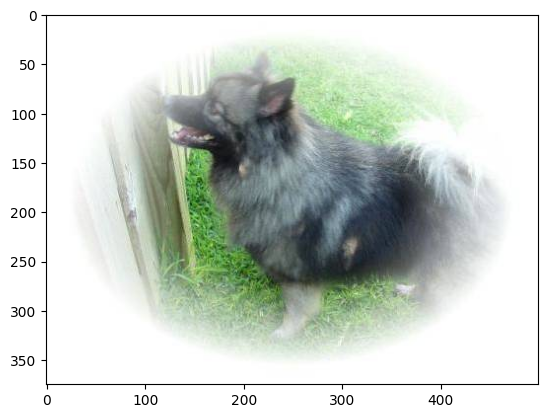

In [6]:
sample = random.choice(filenames)
image = load_img("./train/" + sample)
plt.imshow(image)

###**Create Model**

In [7]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

opt = keras.optimizers.Adam(learning_rate=0.0005)   #setting low lr
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0

In [8]:
df["class"] = df["class"].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,dog.5285.jpg,dog
1,dog.5277.jpg,dog
2,cat.3614.jpg,cat
3,cat.5745.jpg,cat
4,cat.9624.jpg,cat


In [9]:
#create train-test split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=7)
train_df = train_df.reset_index(drop=True)        #reset index number
validate_df = validate_df.reset_index(drop=True)

In [10]:
train_df.head()

,filename,class
0,cat.11324.jpg,cat
1,dog.1547.jpg,dog
2,dog.11969.jpg,dog
3,dog.5673.jpg,dog
4,cat.4118.jpg,cat


In [11]:
#setting up data generator for training
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [12]:
#setting up data generator for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [13]:
#generated data looks like
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


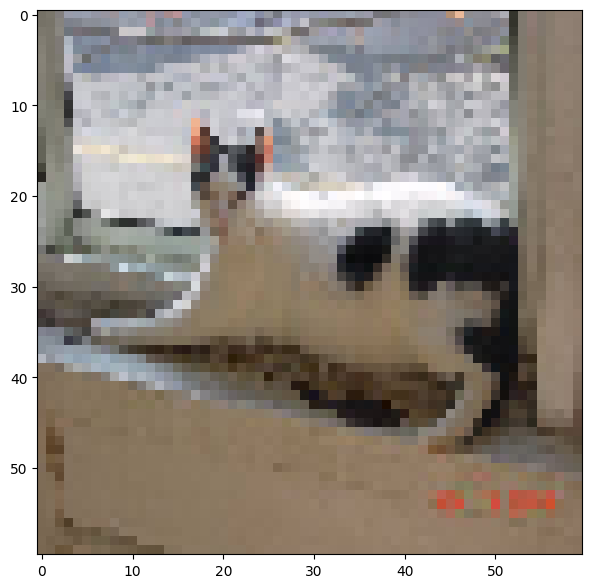

In [14]:
plt.figure(figsize=(6, 6))

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

###**Train Model**

In [15]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10
625/625 [==============================] - 52s 76ms/step - loss: 0.6121 - accuracy: 0.6502 - val_loss: 0.5041 - val_accuracy: 0.7638
Epoch 2/10
625/625 [==============================] - 44s 71ms/step - loss: 0.4878 - accuracy: 0.7618 - val_loss: 0.4740 - val_accuracy: 0.7740
Epoch 3/10
625/625 [==============================] - 43s 69ms/step - loss: 0.4394 - accuracy: 0.7932 - val_loss: 0.4421 - val_accuracy: 0.7927
Epoch 4/10
625/625 [==============================] - 40s 64ms/step - loss: 0.3925 - accuracy: 0.8227 - val_loss: 0.4235 - val_accuracy: 0.8059
Epoch 5/10
625/625 [==============================] - 43s 69ms/step - loss: 0.3424 - accuracy: 0.8486 - val_loss: 0.4235 - val_accuracy: 0.8039
Epoch 6/10
625/625 [==============================] - 39s 63ms/step - loss: 0.2985 - accuracy: 0.8713 - val_loss: 0.4886 - val_accuracy: 0.7768
Epoch 7/10
625/625 [==============================] - 42s 68ms/step - loss: 0.2447 - accuracy: 0.8972 - val_loss: 0.4621 - val_accuracy:

In [44]:
# Save model
model.save_weights("cats_vs_dogs_10_epochs.h5")

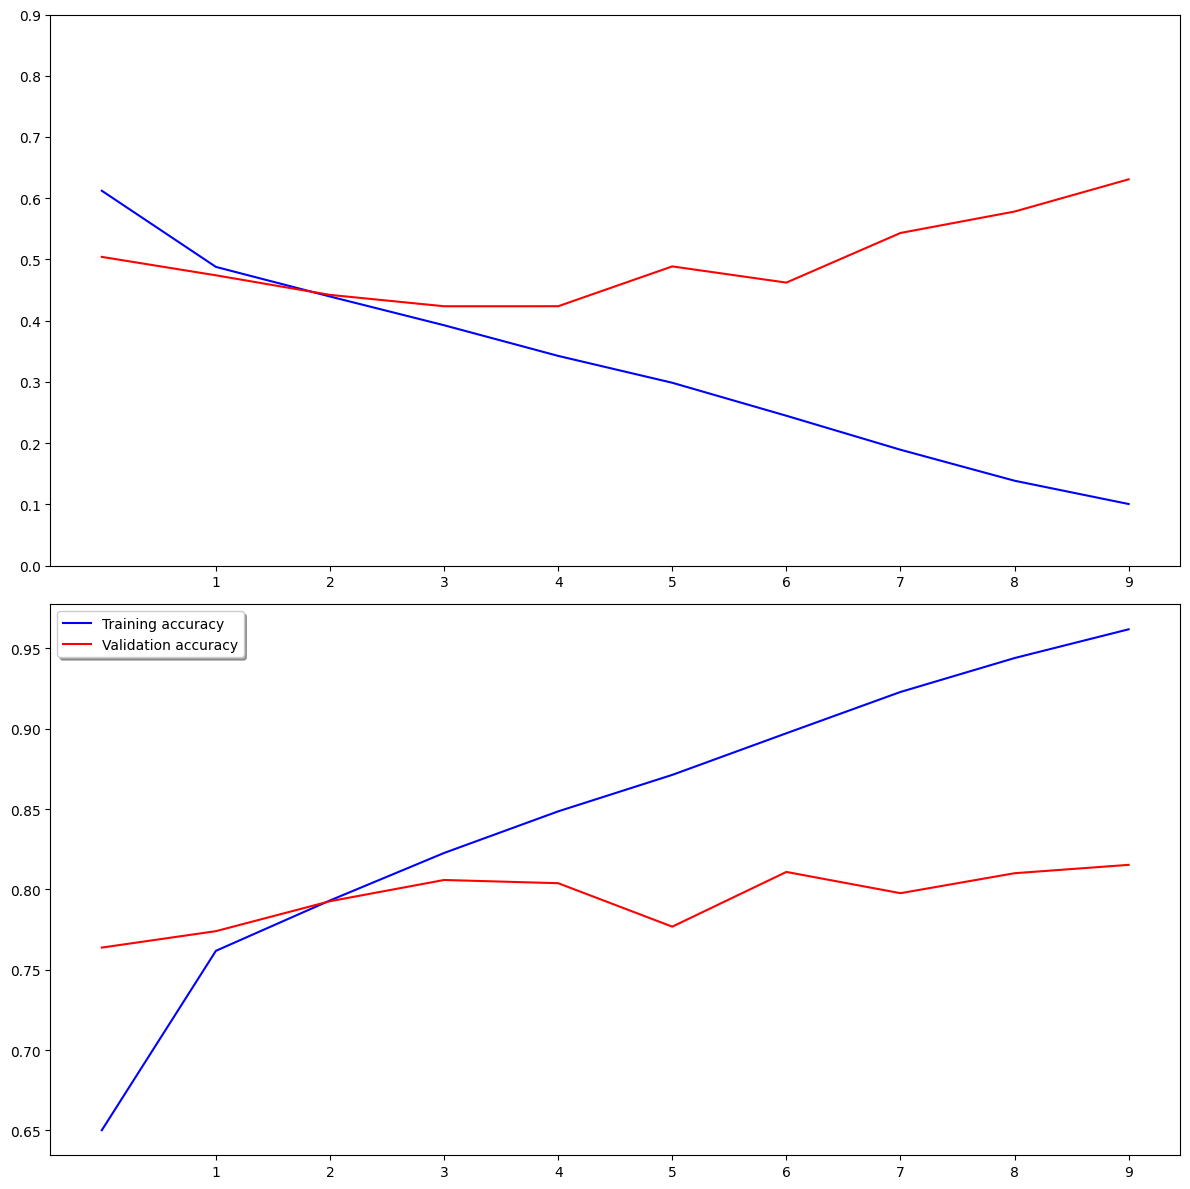

In [16]:
# View performance plots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

###**Inference**

In [52]:
from keras.preprocessing import image

# Load image and resize it to match the input shape of your model
img_path = '/content/test1/10005.jpg'
img = image.load_img(img_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0

predictions = model.predict(img_array)

1/1 [==============================] - 0s 32ms/step


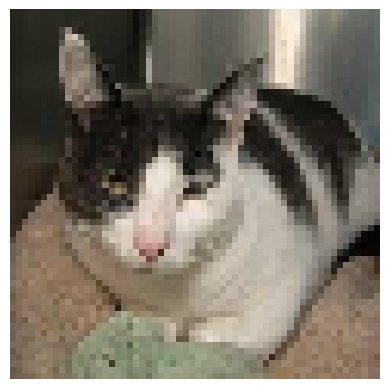

In [59]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [53]:
if np.argmax(predictions, axis=-1)[0]==1:
  print("It's a dog")
else:
  print("It's a cat")

It's a cat
